<a href="https://colab.research.google.com/github/aditya301cs/Daily-Data-Science-ML/blob/main/Out_of_Bag_(OOB)_Evaluation_in_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Out-of-Bag (OOB) Evaluation in Random Forest 🌲

Out-of-Bag (OOB) Evaluation is an internal validation technique used in **Random Forest** models.
It allows us to estimate model performance **without explicitly splitting data** into training
and validation sets.

This makes OOB especially useful when:
- Data is limited
- We want faster evaluation
- We are already using bootstrapping


## What is Bootstrapping?

Random Forest uses **bootstrapping**, which means:
- Each decision tree is trained on a random sample **with replacement**
- Some samples appear multiple times
- Some samples are **not selected at all**

📊 On average:
- ~63% of data → used for training a tree
- ~37% of data → left out → called **Out-of-Bag (OOB) samples**


## What are Out-of-Bag (OOB) Samples?

For a given decision tree:
- Data points **not used** in training that tree
- These samples act like **unseen test data** for that tree

Key Insight 💡  
Each data point becomes an OOB sample for **multiple trees** across the forest.


## How Does OOB Evaluation Work?

1️⃣ **Bootstrapping**
Each tree is trained on a bootstrapped dataset

2️⃣ **Training**
Tree learns patterns only from its sampled data

3️⃣ **OOB Prediction**
OOB samples are passed through that tree for prediction

4️⃣ **Aggregation**
Each data point gets predictions from all trees
where it was OOB

5️⃣ **OOB Error**
Final error is computed using:
- Majority vote (classification)
- Mean prediction (regression)


## Why OOB Works (Intuition)

Since OOB samples were **never seen** during training of a tree:
- Their predictions are unbiased
- Similar to validation data

Mathematically:
Each sample is evaluated by ~37% of trees
→ strong estimate of generalization performance


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train Random Forest with OOB evaluation
rf = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    bootstrap=True,
    random_state=42
)

rf.fit(X, y)

# OOB Score
print(f"OOB Score: {rf.oob_score_:.4f}")


OOB Score: 0.9533


## Interpreting OOB Score

- OOB Score ≈ Validation Accuracy
- Higher score → better generalization
- If OOB score ≈ Test score → model is not overfitting

⚠️ OOB is an **estimate**, not a guarantee


## OOB vs Cross-Validation (CV)

| Aspect | OOB Evaluation | Cross-Validation |
|------|---------------|------------------|
| Model Dependency | Only bootstrapped models | Any ML model |
| Extra Training | No | Yes |
| Speed | Faster | Slower |
| Data Usage | Uses full dataset | Splits data |
| Stability | Slightly noisy | More stable |


## When Should You Use OOB?

✅ Use OOB when:
- Using Random Forest
- Dataset is small or medium
- Want quick model validation
- Hyperparameter tuning (initial phase)

❌ Avoid OOB when:
- Dataset is very small
- Model does NOT use bootstrapping
- You need highly stable estimates


## Pros of OOB Evaluation

✔ No need for validation split  
✔ Computationally efficient  
✔ Uses full dataset  
✔ Built-in with Random Forest  
✔ Helps detect overfitting early  


## Cons / Limitations of OOB Evaluation

❌ Works only with bootstrapped models  
❌ Less stable for very small datasets  
❌ Not applicable to:
   - Gradient Boosting
   - XGBoost
   - Neural Networks
❌ Slightly optimistic in noisy data


## Interview-Ready Summary 🎯

"Out-of-Bag Evaluation is an internal validation technique in Random Forests.
It uses samples not selected during bootstrapping to estimate model performance
without requiring a separate validation set. It is efficient, unbiased, and
especially useful when data is limited."


## Key Takeaway 🚀

OOB Evaluation =  
📌 Free validation  
📌 Faster than cross-validation  
📌 Reliable for Random Forests  
📌 Perfect for quick model assessment


# Comparing OOB Score vs Cross-Validation Score

In this notebook, we compare:
- **Out-of-Bag (OOB) Evaluation**
- **K-Fold Cross-Validation (CV)**

using the same Random Forest model and dataset.


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import numpy as np


In [3]:
# Load dataset
data = load_iris()
X = data.data
y = data.target


## 1️⃣ OOB Evaluation
We enable `oob_score=True` while training the Random Forest.


In [4]:
rf_oob = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    bootstrap=True,
    random_state=42
)

rf_oob.fit(X, y)

print(f"OOB Score: {rf_oob.oob_score_:.4f}")


OOB Score: 0.9533


## 2️⃣ Cross-Validation Evaluation
We use **5-Fold Cross-Validation** on the same model.


In [5]:
rf_cv = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(
    rf_cv,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")


CV Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9667


## 3️⃣ Side-by-Side Comparison


In [6]:
print("OOB Score        :", round(rf_oob.oob_score_, 4))
print("Mean CV Score   :", round(np.mean(cv_scores), 4))


OOB Score        : 0.9533
Mean CV Score   : 0.9667


## Interpretation of Results 📊

- OOB Score ≈ Mean CV Score → Model generalizes well
- Small difference is normal due to randomness
- CV is usually **slightly more stable**
- OOB is **much faster**


## Key Observations

✔ OOB and CV often give similar estimates  
✔ OOB avoids explicit data splitting  
✔ CV is more reliable for small datasets  
✔ OOB is ideal for quick validation  


## Interview-Ready Conclusion 🎯

"OOB score provides a fast, internal estimate of model performance
by using unused bootstrapped samples, while cross-validation explicitly
splits data into folds. OOB is efficient for Random Forests, whereas
cross-validation is more general and stable."


## When to Prefer What?

✅ Prefer OOB:
- Random Forest
- Limited data
- Faster experimentation

✅ Prefer CV:
- Any ML model
- Very small datasets
- Final model evaluation


# OOB vs Cross-Validation: Score & Speed Comparison

This experiment compares:
- Model performance (accuracy)
- Computational efficiency (time)

for:
✔ Out-of-Bag (OOB) Evaluation  
✔ 5-Fold Cross-Validation (CV)


In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt

## 1️⃣ OOB Training Time


In [8]:
start_oob = time.time()

rf_oob = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    bootstrap=True,
    random_state=42
)

rf_oob.fit(X, y)

oob_time = time.time() - start_oob
oob_score = rf_oob.oob_score_

print(f"OOB Score: {oob_score:.4f}")
print(f"OOB Training Time: {oob_time:.4f} seconds")


OOB Score: 0.9533
OOB Training Time: 0.1386 seconds


## 2️⃣ Cross-Validation Training Time


In [9]:
start_cv = time.time()

rf_cv = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(
    rf_cv,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

cv_time = time.time() - start_cv
cv_score_mean = np.mean(cv_scores)

print(f"Mean CV Score: {cv_score_mean:.4f}")
print(f"Cross-Validation Time: {cv_time:.4f} seconds")


Mean CV Score: 0.9667
Cross-Validation Time: 0.8149 seconds


## 3️⃣ Plot: OOB Score vs CV Score


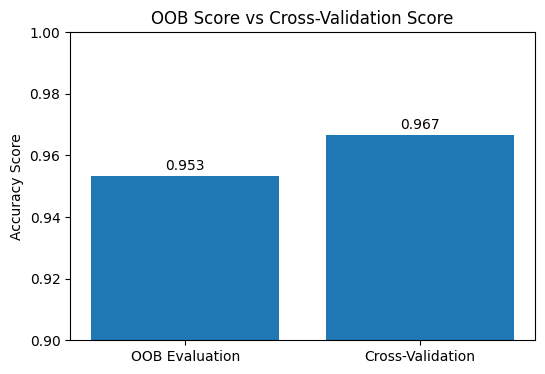

In [10]:
methods = ["OOB Evaluation", "Cross-Validation"]
scores = [oob_score, cv_score_mean]

plt.figure(figsize=(6, 4))
plt.bar(methods, scores)
plt.ylabel("Accuracy Score")
plt.title("OOB Score vs Cross-Validation Score")
plt.ylim(0.9, 1.0)

for i, score in enumerate(scores):
    plt.text(i, score + 0.002, f"{score:.3f}", ha='center')

plt.show()


## 4️⃣ Plot: Training Time Comparison


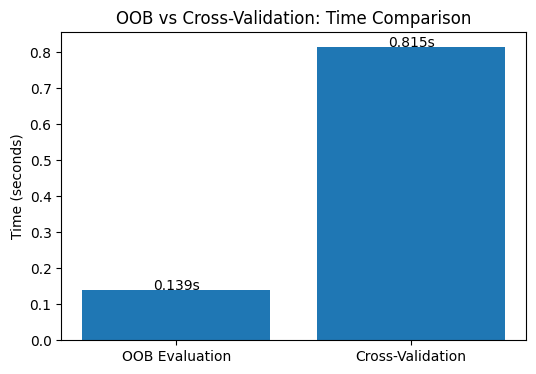

In [11]:
times = [oob_time, cv_time]

plt.figure(figsize=(6, 4))
plt.bar(methods, times)
plt.ylabel("Time (seconds)")
plt.title("OOB vs Cross-Validation: Time Comparison")

for i, t in enumerate(times):
    plt.text(i, t + 0.001, f"{t:.3f}s", ha='center')

plt.show()


## Key Insights 📌

📊 **Accuracy**
- OOB score is very close to CV score
- Indicates good generalization
- Minor difference is expected

⏱ **Speed**
- OOB is significantly faster
- CV retrains model `k` times
- OOB evaluation happens during training


### Final Conclusion 🎯

"OOB evaluation provides a fast and reliable estimate of model performance
with minimal computational cost, while cross-validation offers more stable
results at the expense of higher training time. For Random Forests,
OOB is ideal for quick validation, whereas CV is preferred for final evaluation."
